In [15]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [16]:
dynamic = "dynamic"
bnb = "bnb"
mean = "mean"
std = "std"

In [17]:
results = {}
for i in range(4,21):
    results[i] = pd.read_csv(filepath_or_buffer='..\src\\output\\'+ str(i) + '.csv')

In [55]:
results_std = {}
results_mean = {}

results_std[dynamic] = {}
results_std[bnb] = {}

results_mean[dynamic] = {}
results_mean[bnb] = {}

for i in results:  
    
    results_mean[dynamic][i] = results[i][dynamic].mean()
    results_std[dynamic][i] = results[i][dynamic].std()
    
    results_mean[bnb][i] = results[i][bnb].mean()
    results_std[bnb][i] = results[i][bnb].std()
    
results_std = pd.DataFrame(results_std)
results_mean = pd.DataFrame(results_mean)
results_mean

,bnb,dynamic
4,0.000000e+00,0.000000
5,0.000000e+00,0.000000
6,1.000600e+05,0.000000
7,1.100500e+06,600470.000000
8,7.004600e+05,500340.000000
9,1.600820e+06,1300980.000000
10,9.770200e+06,800570.000000
11,1.180796e+07,4302680.000000
12,1.450946e+07,1500890.000000
13,1.150786e+07,1701080.000000


### Mean Execution Time Analysis

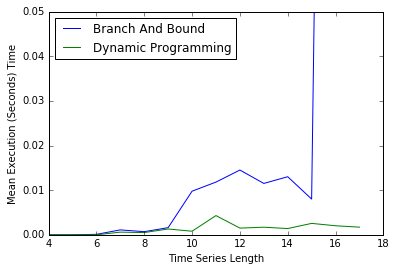

In [19]:
import matplotlib.pyplot as plt
plt.ylim(0,0.05)
plt.plot(results_mean[bnb][:14]/1000000000,label="Branch And Bound")
plt.plot(results_mean[dynamic][:14]/1000000000,label="Dynamic Programming")
plt.legend(loc='upper left')
plt.xlabel("Time Series Length")
plt.ylabel("Mean Execution (Seconds) Time")

### Execution Time Stdev Analysis  

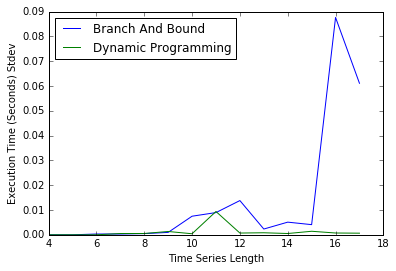

In [20]:
import matplotlib.pyplot as plt
#plt.ylim(0,0.05)
plt.plot(results_std[bnb][:14]/1000000000,label="Branch And Bound")
plt.plot(results_std[dynamic][:14]/1000000000,label="Dynamic Programming")
plt.legend(loc='upper left')
plt.xlabel("Time Series Length")
plt.ylabel("Execution Time (Seconds) Stdev")

### Mean Analysis

#### Levenes test

In [58]:
import scipy.stats
scipy.stats.levene(results_std[bnb],results_std[dynamic])

LeveneResult(statistic=1.0981427347146711, pvalue=0.30252486681634133)

#### Paired T-Test

In [56]:
from scipy import stats
max_len = 12
print("results_mean[bnb] = " + str(results_mean[bnb][:max_len].mean()))
print("results_mean[dynamic] = " + str(results_mean[dynamic][:max_len].mean()))
print(stats.ttest_rel(results_mean[bnb][:max_len], results_mean[dynamic][:max_len]))

results_mean[bnb] = 6009264.81481
results_mean[dynamic] = 1222035.18519
Ttest_relResult(statistic=3.2187453343448613, pvalue=0.0081772999362577214)


#### Wilcoxon Test

In [36]:
scipy.stats.wilcoxon(results_mean[bnb],results_mean[dynamic])

WilcoxonResult(statistic=0.0, pvalue=0.00065495834338569539)